In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('car_age_price.csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
corrmatrix=data.corr()
corrmatrix

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<AxesSubplot:>

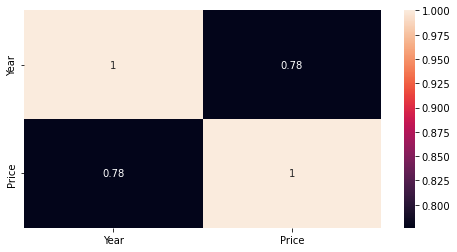

In [6]:
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,annot=True)

In [7]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [8]:
y=data['Price']
x=data.drop(['Price'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

# Linear model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()
model1=lr.fit(x_train,y_train)
predictions=model1.predict(x_test)

In [13]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [14]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [24]:
m  = model1.coef_
print(m)

[47608.56780808]


In [25]:
c = model1.intercept_
c

-95520922.49198581

In [ ]:
#eqn for predicting price
#y=price
#x=year


#y=47608.56780808x - 95520922.49198581

In [15]:
from sklearn.metrics import mean_squared_error,r2_score


In [16]:
mean_squared_error(y_test,predictions)

4326906256.829671

In [17]:
r2_score(y_test,predictions)

0.36759313425902185

In [18]:
model1.score(x_test,y_test)

0.36759313425902185

In [19]:
model1.score(x_train,y_train)

0.6389354253755697

# Lasso model

In [26]:
from sklearn.linear_model import Lasso

In [28]:
lasso_reg=Lasso(alpha=50,max_iter=100,tol=0.1)
model2=lasso_reg.fit(x_train,y_train)

In [29]:
predictions=model2.predict(x_test)

In [30]:
predictions

array([600725.66012698, 505549.74536845, 553137.70274772, 553137.70274772,
       553137.70274772, 410373.83060992, 505549.74536845, 553137.70274772,
       600725.66012698, 600725.66012698, 315197.91585137, 505549.74536845,
       410373.83060992, 648313.61750625, 553137.70274772, 600725.66012698,
       315197.91585137, 410373.83060992, 505549.74536845, 505549.74536845,
       505549.74536845, 505549.74536845, 505549.74536845])

In [31]:
m  = model2.coef_
print(m)

[47587.95737927]


In [32]:
c = model1.intercept_
c

-95520922.49198581

In [39]:
#eqn for predicting price
#y=price
#x=year

#y = 47587.95737927x - 95520922.49198581

In [34]:
from sklearn.metrics import mean_squared_error,r2_score


In [35]:
mean_squared_error(y_test,predictions)

4324583417.148471

In [36]:
r2_score(y_test,predictions)

0.36793263312384883

In [37]:
model2.score(x_test,y_test)

0.36793263312384883

In [38]:
model2.score(x_train,y_train)

0.6389353056296263